In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
inputs=[1,2,3,2.5]

weights1=[0.2,0.8,-0.5,1.0]
weights2=[0.5,-0.91,0.26,-0.5]
weights3=[-0.26,-0.27,0.17,0.87]


bias1=2
bias2=3
bias3=0.5

outputs=[inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3] + bias1,
        inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3] +  bias2,
        inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3] +  bias3]

print(outputs)


[4.8, 1.21, 2.385]


In [4]:
weights=[[0.2,0.8,-0.5,1.0],
        [0.5,-0.91,0.26,-0.5],
        [-0.26,-0.27,0.17,0.87]]

biases = [2,3,0.5]

print(list(zip(biases,weights)))

[(2, [0.2, 0.8, -0.5, 1.0]), (3, [0.5, -0.91, 0.26, -0.5]), (0.5, [-0.26, -0.27, 0.17, 0.87])]


In [5]:
#trying out dotproduct

import numpy as np

inputs=[1,2,3,2.5]
weights = [0.2,0.8,-0.5,1.0]
bias= 2

output =np.dot(weights,inputs) +  bias
print(output)



4.8


In [6]:
inputs=[1,2,3,2.5]

weights=[[0.2,0.8,-0.5,1.0],
        [0.5,-0.91,0.26,-0.5],
        [-0.26,-0.27,0.17,0.87]]

biases = [2,3,0.5]

outputs=np.dot(weights,inputs) +  biases

#no.dot(weights,inputs) = [np.dot(weight[0],inputs),np.dot(weight[1],inputs),np.dot(weight[2],inputs) ] 

print(outputs)

[4.8   1.21  2.385]


In [8]:
#using batches 

inputs=[[1,2,3,2.5],
        [2,5,1,2],
        [-1.5,2.7,3.3,-0.8]]

weights =[[0.2,0.8,-0.5,1.0],
        [0.5,-0.91,0.26,-0.5],
        [-0.26,-0.27,0.17,0.87]]

biases = [2,3,0.5]

#weights is (3X4) and inputs is also (3X4), so we need to transpose the inputs matrix for multiplication
output = np.dot(weights,np.array(inputs).T) + biases
print(output)

[[ 4.8    8.9   -0.09 ]
 [ 0.21  -1.29  -1.449]
 [ 3.885  3.04   0.026]]


In [14]:


weights2 = [[0.1,-0.14,0.5],
            [-0.5,0.12,-0.33],
            [-0.44,0.73,-0.13]]

biases2 = [-1,2,-0.5]

layer1_outputs = np.dot(inputs,np.array(weights).T) + biases

layer2_outputs = np.dot(layer1_outputs , np.array(weights2).T) + biases2 

print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2406  -2.283   -4.9879 ]
 [-0.99314  1.41254 -0.35655]]


In [26]:
#converting inputs into objects for cleaner and more dynamic code 
import numpy as np

X = [[1,2,3,2.5],
    [2,5,1,2],
    [-1.5,2.7,3.3,-0.8]]

np.random.seed(0)

class Layer_Dense :
    def __init__(self,n_inputs,n_neurons):
        self.weights = 0.10*np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1,n_neurons))

    def forward(self,inputs):
        self.output=(np.dot(inputs,self.weights)) + self.biases

layer1=Layer_Dense(4,5)
layer2=Layer_Dense(5,5)
layer3=Layer_Dense(5,2)

layer1.forward(X)
#print(layer1.output)

layer2.forward(layer1.output)
#print(layer2.output)


layer3.forward(layer2.output)
print(layer3.output)


[[-0.00126082  0.01375158]
 [ 0.00545449  0.01595045]
 [ 0.00295563  0.01087262]]


In [2]:
#sample code for RELU activation function
inputs = [0.2,-1,3.3,-2.7,1.1,2.2,-100]
output=[]

for i in inputs :
    if i > 0:
        output.append(i)
    else:
        output.append(0)

print(output)

[0.2, 0, 3.3, 0, 1.1, 2.2, 0]


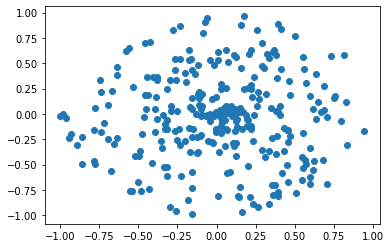

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

X,y=spiral_data(100,3)

plt.scatter(X[:,0],X[:,1])
plt.show()

#plt.scatter(X[:,0],X[:,1])

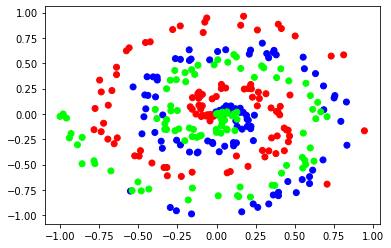

In [18]:
plt.scatter(X[:,0],X[:,1],c=y,cmap="brg")
plt.show()

In [22]:
import nnfs
from nnfs.datasets import spiral_data


class Layer_Dense :
    def __init__(self,n_inputs,n_neurons):
        self.weights = 0.10*np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1,n_neurons))

    def forward(self,inputs):
        self.output=(np.dot(inputs,self.weights)) + self.biases

class Activation_ReLU:
    def forward(self,inputs):
        self.output=np.maximum(0,inputs)

nnfs.init()

X,y=spiral_data(100,3)

layer1=Layer_Dense(2,5)
activation1 = Activation_ReLU()

layer1.forward(X)

#print(layer1.output)
activation1.forward(layer1.output)
print(activation1.output)



[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65504505e-04
  4.56846210e-05]
 [0.00000000e+00 5.93469958e-05 0.00000000e+00 2.03573116e-04
  6.10024377e-04]
 ...
 [1.13291524e-01 0.00000000e+00 0.00000000e+00 8.11079666e-02
  0.00000000e+00]
 [1.34588361e-01 0.00000000e+00 3.09493970e-02 5.66337556e-02
  0.00000000e+00]
 [1.07817926e-01 0.00000000e+00 0.00000000e+00 8.72561932e-02
  0.00000000e+00]]


In [27]:
#softmax activation
import math

layer_outputs =[4.8,1.21,2.385]

E=math.e        #euler's constant
exp_values = []

for output in layer_outputs :
    exp_values.append(math.pow(E,output))



In [28]:
#normalization for getting probability as output

norm_base = sum(exp_values)
norm_values = []

for value in exp_values :
    norm_values.append(value/norm_base)


print(norm_values)


[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]
